In [26]:
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

## TU257 - Lab 10-2 - Clustering - Demo Notebook (2)
##### 
##### Density Based Clustering
#####    In this notebook we will look at an Example of Density Based Clustering - DBScan

In [27]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [28]:
#initialize the random seed
np.random.seed(42) #it is the answer to everything!

#Create a function to create our data points in a circular format
#We will call this function below, to create our dataframe
def CreateDataPoints(r, n):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [29]:
#Use the function to create different sets of data, each having a circular format
df=pd.DataFrame(CreateDataPoints(800,1500))  #500, 1000
df=df.append(CreateDataPoints(500,850))      #300, 700
df=df.append(CreateDataPoints(200,450))      #100, 300

# Adding noise to the dataset
df=df.append([(np.random.randint(-850,850),np.random.randint(-850,850)) for i in range(450)])

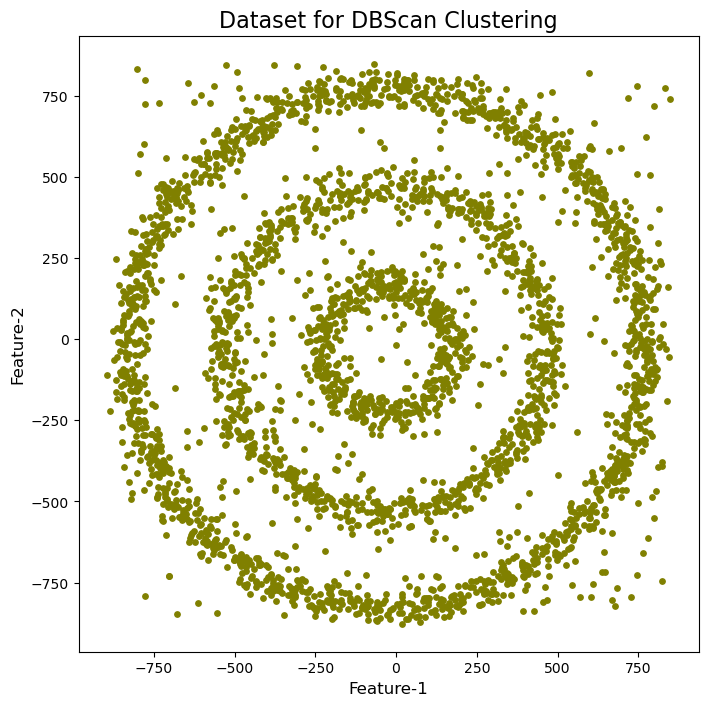

In [30]:
plt.figure(figsize=(8,8))
plt.scatter(df[0],df[1],s=15,color='olive')
plt.title('Dataset for DBScan Clustering',fontsize=16)
plt.xlabel('Feature-1',fontsize=12)
plt.ylabel('Feature-2',fontsize=12)
plt.show()

In [31]:
from sklearn.cluster import DBSCAN
#DBSCAN without any parameter optimization and see the results.
dbscan=DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN()

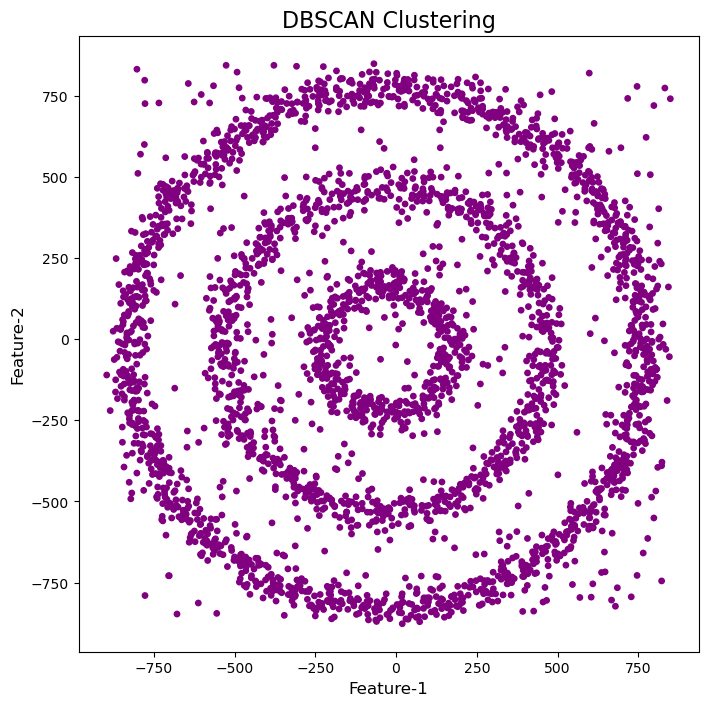

In [32]:
df['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(8,8))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=16)
plt.xlabel('Feature-1',fontsize=12)
plt.ylabel('Feature-2',fontsize=12)
plt.show()
#Not very useful !
#Everything belongs to one cluster. 

In [33]:
#Let's explore the data and work out a better setting
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

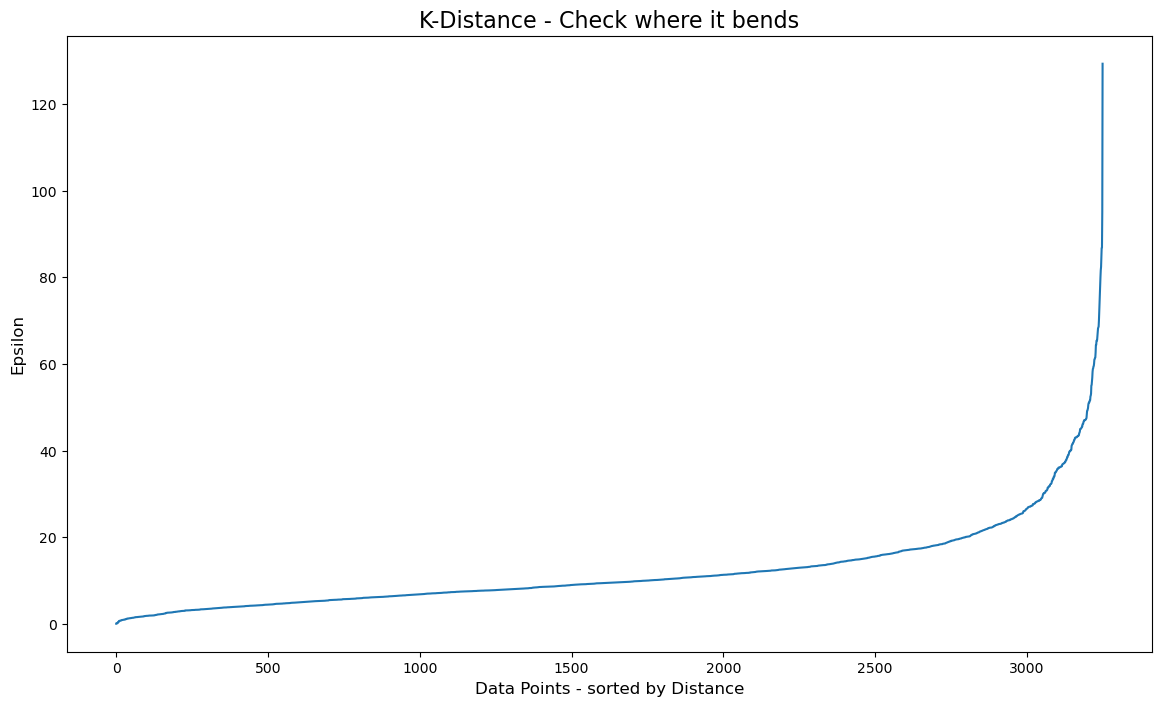

In [34]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(14,8))
plt.plot(distances)
plt.title('K-Distance - Check where it bends',fontsize=16)
plt.xlabel('Data Points - sorted by Distance',fontsize=12)
plt.ylabel('Epsilon',fontsize=12)
plt.show()
#Let’s plot our K-distance graph and find the value of epsilon

In [35]:
#The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, 
#  which is 30 in this case

In [36]:
#Now, it’s time to find the value of minPoints. 
#The value of minPoints also depends on domain knowledge. 
#This time I am taking minPoints as 6

In [37]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=3)
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=3)

In [38]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 0     1586
 4      899
 7      467
-1      258
 11       5
 10       4
 14       4
 1        3
 2        3
 3        3
 5        3
 6        3
 8        3
 9        3
 12       3
 13       3
Name: DBSCAN_opt_labels, dtype: int64

In [39]:
# 0, 1 and 2 are the three different clusters, and -1 is the noise

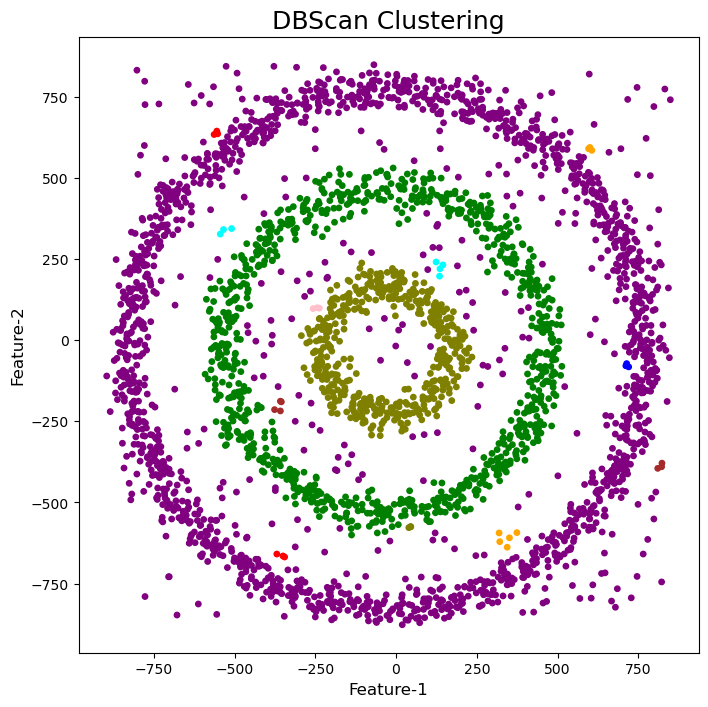

In [40]:
# Plotting the resulting clusters
colors=['purple','red','blue','green', 'olive', 'pink', 'cyan', 'orange', 'brown' ]
plt.figure(figsize=(8,8))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBScan Clustering',fontsize=18)
plt.xlabel('Feature-1',fontsize=12)
plt.ylabel('Feature-2',fontsize=12)
plt.show()

In [41]:
df2 = df[df['DBSCAN_opt_labels'].isin([-1,0,4,7])]

In [42]:
df2['DBSCAN_opt_labels'].value_counts()

 0    1586
 4     899
 7     467
-1     258
Name: DBSCAN_opt_labels, dtype: int64

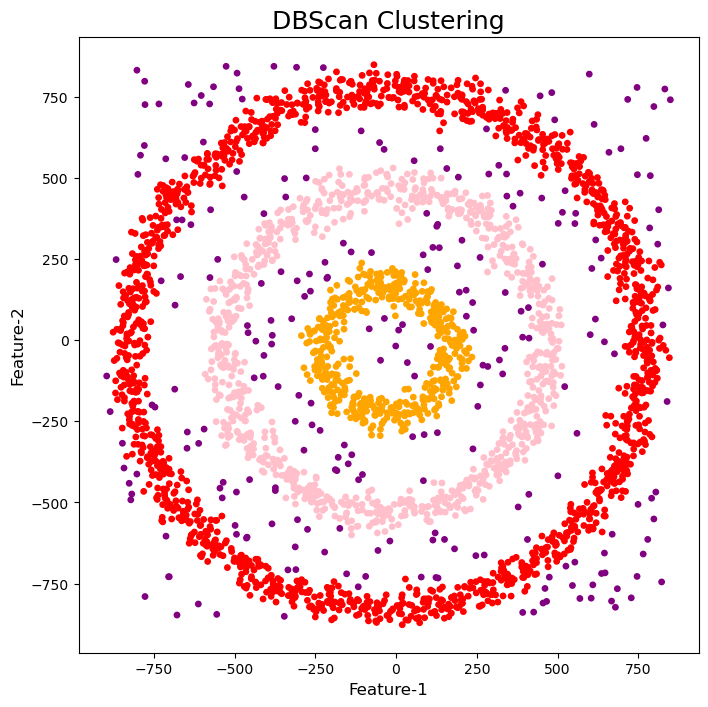

In [43]:
# Plotting the resulting clusters
colors=['purple','red','blue','green', 'olive', 'pink', 'cyan', 'orange']
plt.figure(figsize=(8,8))
plt.scatter(df2[0],df2[1],c=df2['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBScan Clustering',fontsize=18)
plt.xlabel('Feature-1',fontsize=12)
plt.ylabel('Feature-2',fontsize=12)
plt.show()

In [44]:
#Now try this dataset with k-Means and other

In [45]:
#k-Means with 3 clusters
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=3,random_state=42)
k_means.fit(df[[0,1]])

KMeans(n_clusters=3, random_state=42)

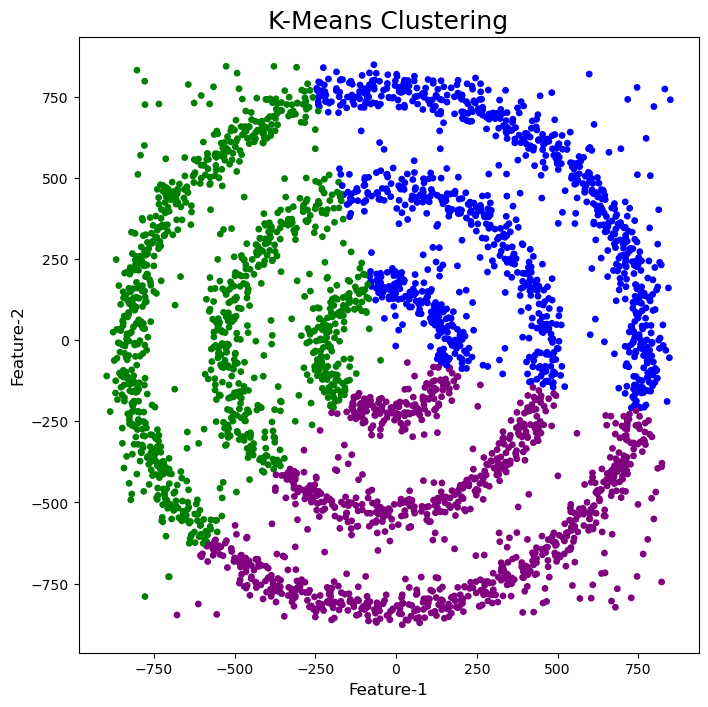

In [46]:
df['KMeans_labels']=k_means.labels_

# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(8,8))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=18)
plt.xlabel('Feature-1',fontsize=12)
plt.ylabel('Feature-2',fontsize=12)
plt.show()

In [47]:
from sklearn.cluster import AgglomerativeClustering
#model = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
model = AgglomerativeClustering(n_clusters=3)
model.fit(df[[0,1]])

AgglomerativeClustering(n_clusters=3)

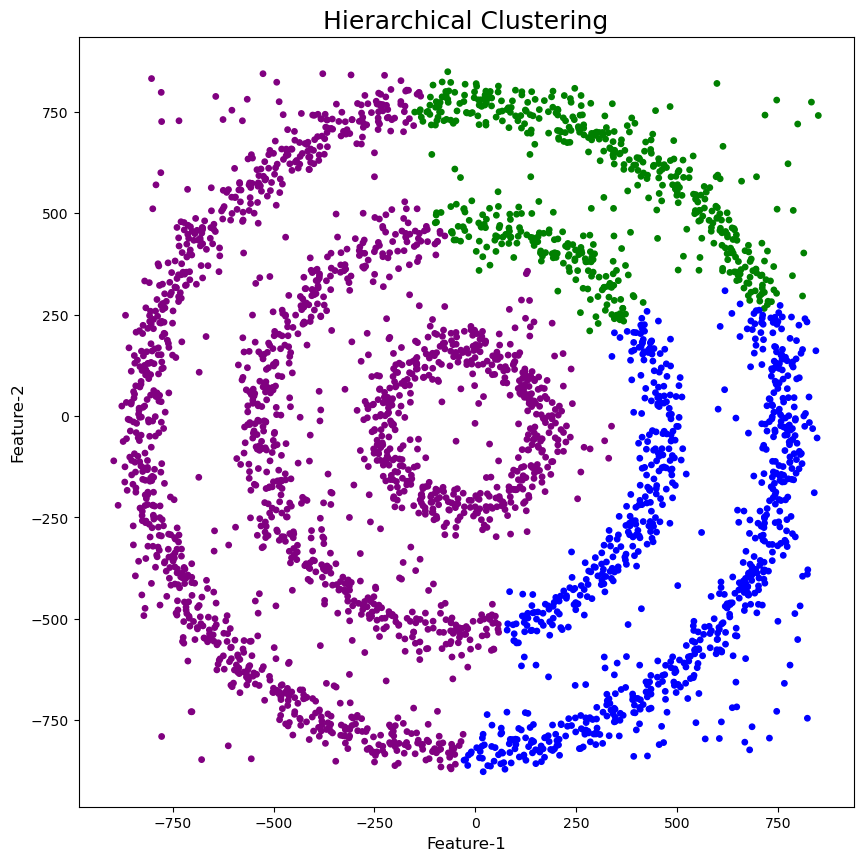

In [48]:
df['HR_labels']=model.labels_

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=18)
plt.xlabel('Feature-1',fontsize=12)
plt.ylabel('Feature-2',fontsize=12)
plt.show()